In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.facecolor'] = 'white'

data = pd.read_csv('collectedData/meti_tabela_csv.csv', index_col=0)
parameters = list(data.columns)[1:-4]
parameters_nomath = [p.replace("_pm", "_{pm}").replace("_me", "_{me}") if "(" in p else p.replace("_", " ") for p in parameters]
dataTotal = np.load('collectedData/meti_parameters.npy')
labelsTotal = np.load('collectedData/meti_labels.npy')[:, 0]
data = dataTotal[dataTotal[:, 0] == 1, 1:]
labels = labelsTotal[dataTotal[:, 0] == 1]
data2 = dataTotal[dataTotal[:, 0] == 2, 1:]
labels2 = labelsTotal[dataTotal[:, 0] == 2]
columns = [[4, 6, 7, 9, 10, 11, 12], [4, 5, 8], [4, 6, 7, 9, 10, 11, 12], [6, 9, 13, 14, 15, 16, 17, 18]]
podatki = [(data[data[:, 0] == 1, :][:, columns[0]], [parameters[c] for c in columns[0]], labels[data[:, 0] == 1], 'Model I')]
podatki += [(data[data[:, 1] == 1, :][:, columns[1]], [parameters[c] for c in columns[1]], labels[data[:, 1] == 1], 'Model II')]
podatki += [(data[data[:, 2] == 1, :][:, columns[2]], [parameters[c] for c in columns[2]], labels[data[:, 2] == 1], 'Model III')]
podatki += [(data2[data2[:, 2] == 1, :][:, columns[2]], [parameters[c] for c in columns[2]], labels2[data2[:, 2] == 1], 'Model III - 2')]
podatki += [(data[data[:, 3] == 1, :][:, columns[3]], [parameters[c] for c in columns[3]], labels[data[:, 3] == 1], 'Model IV')]

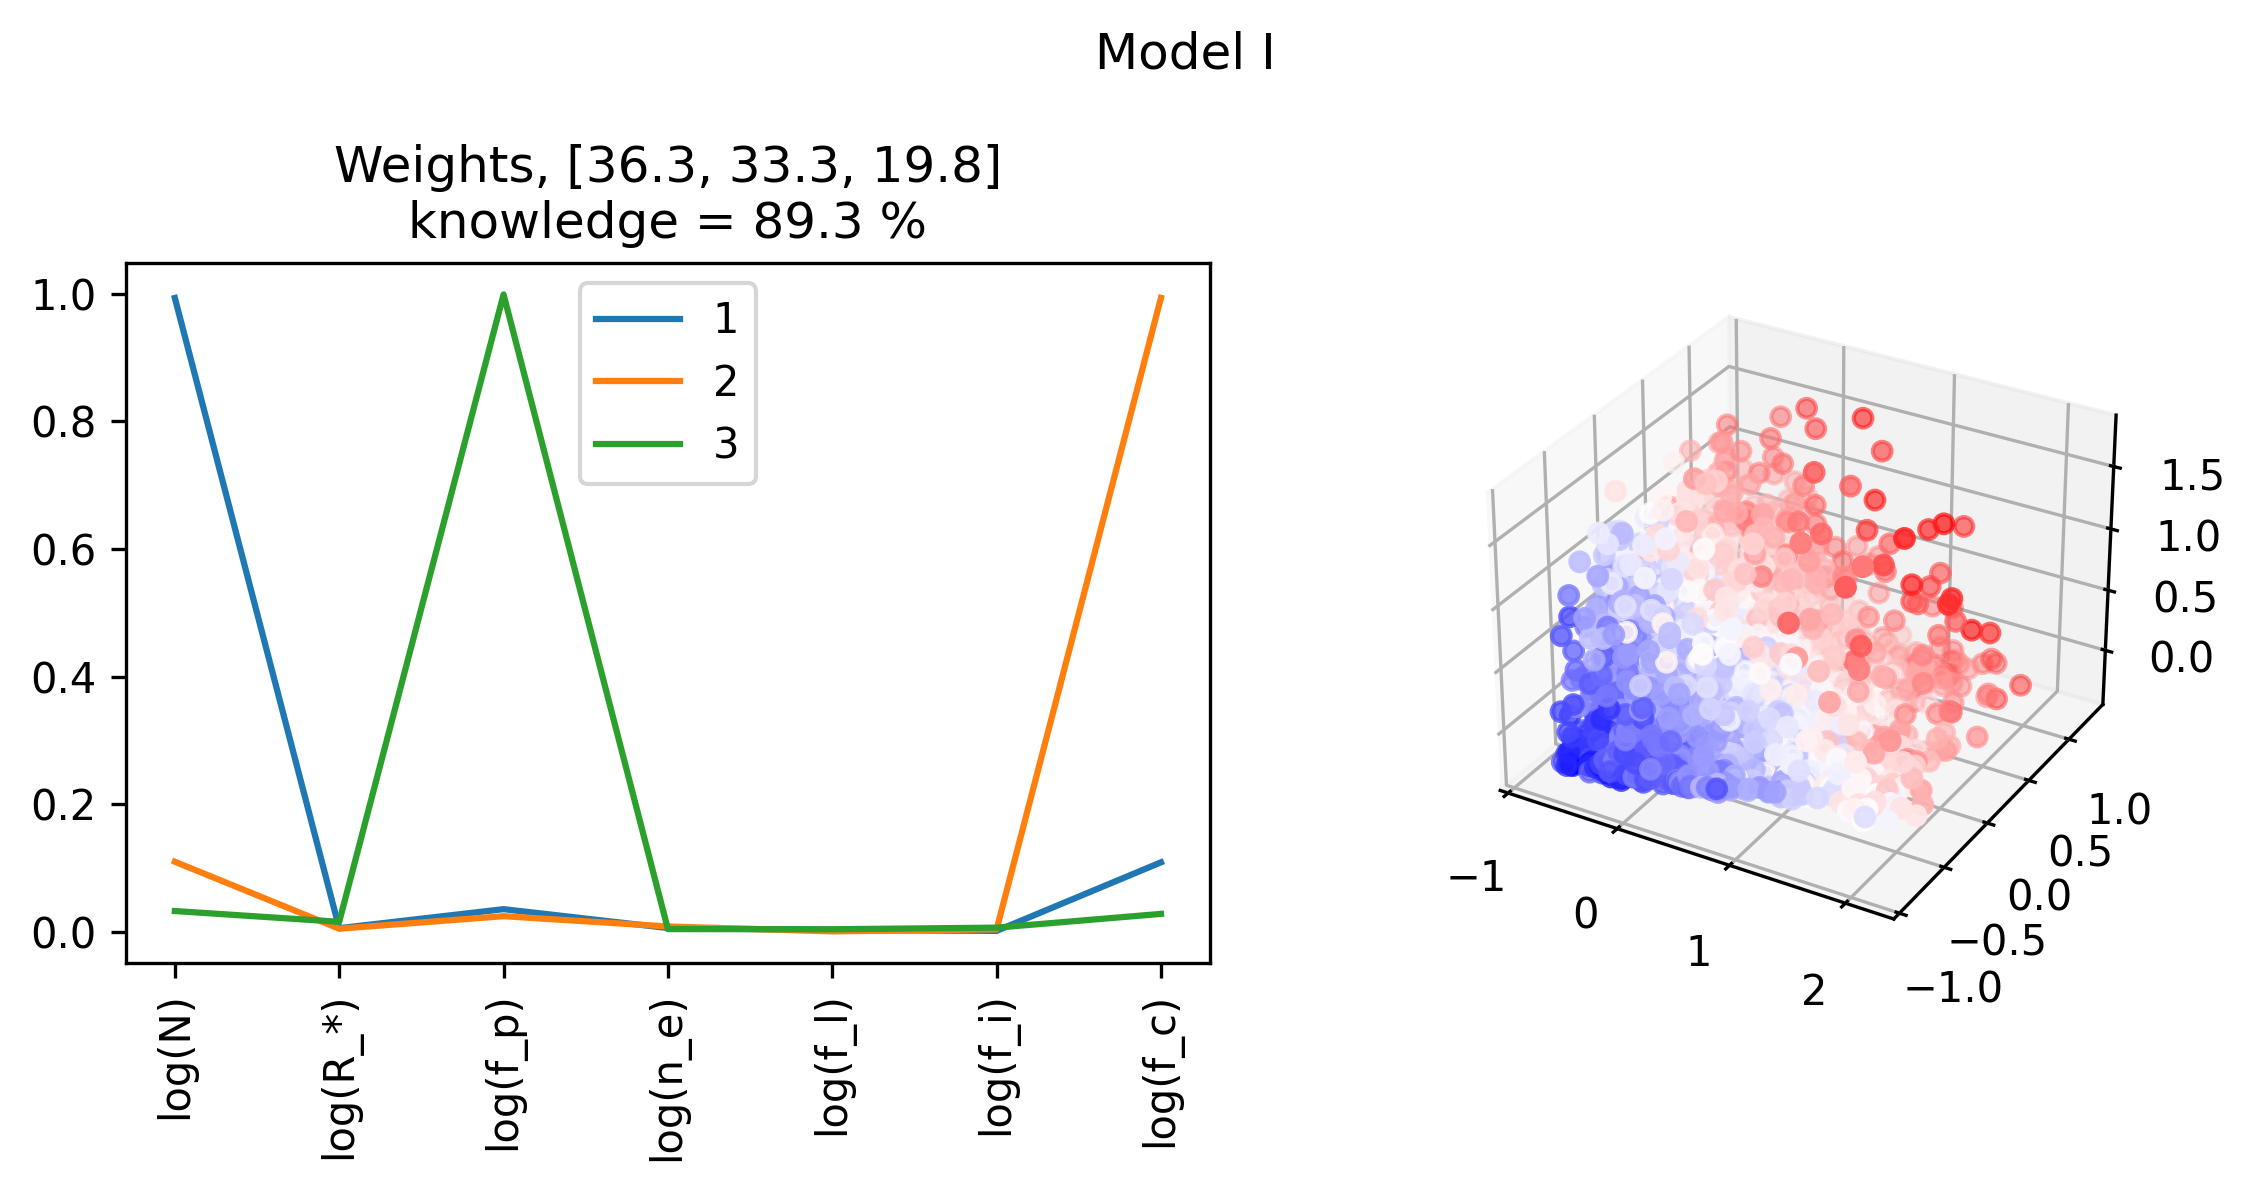

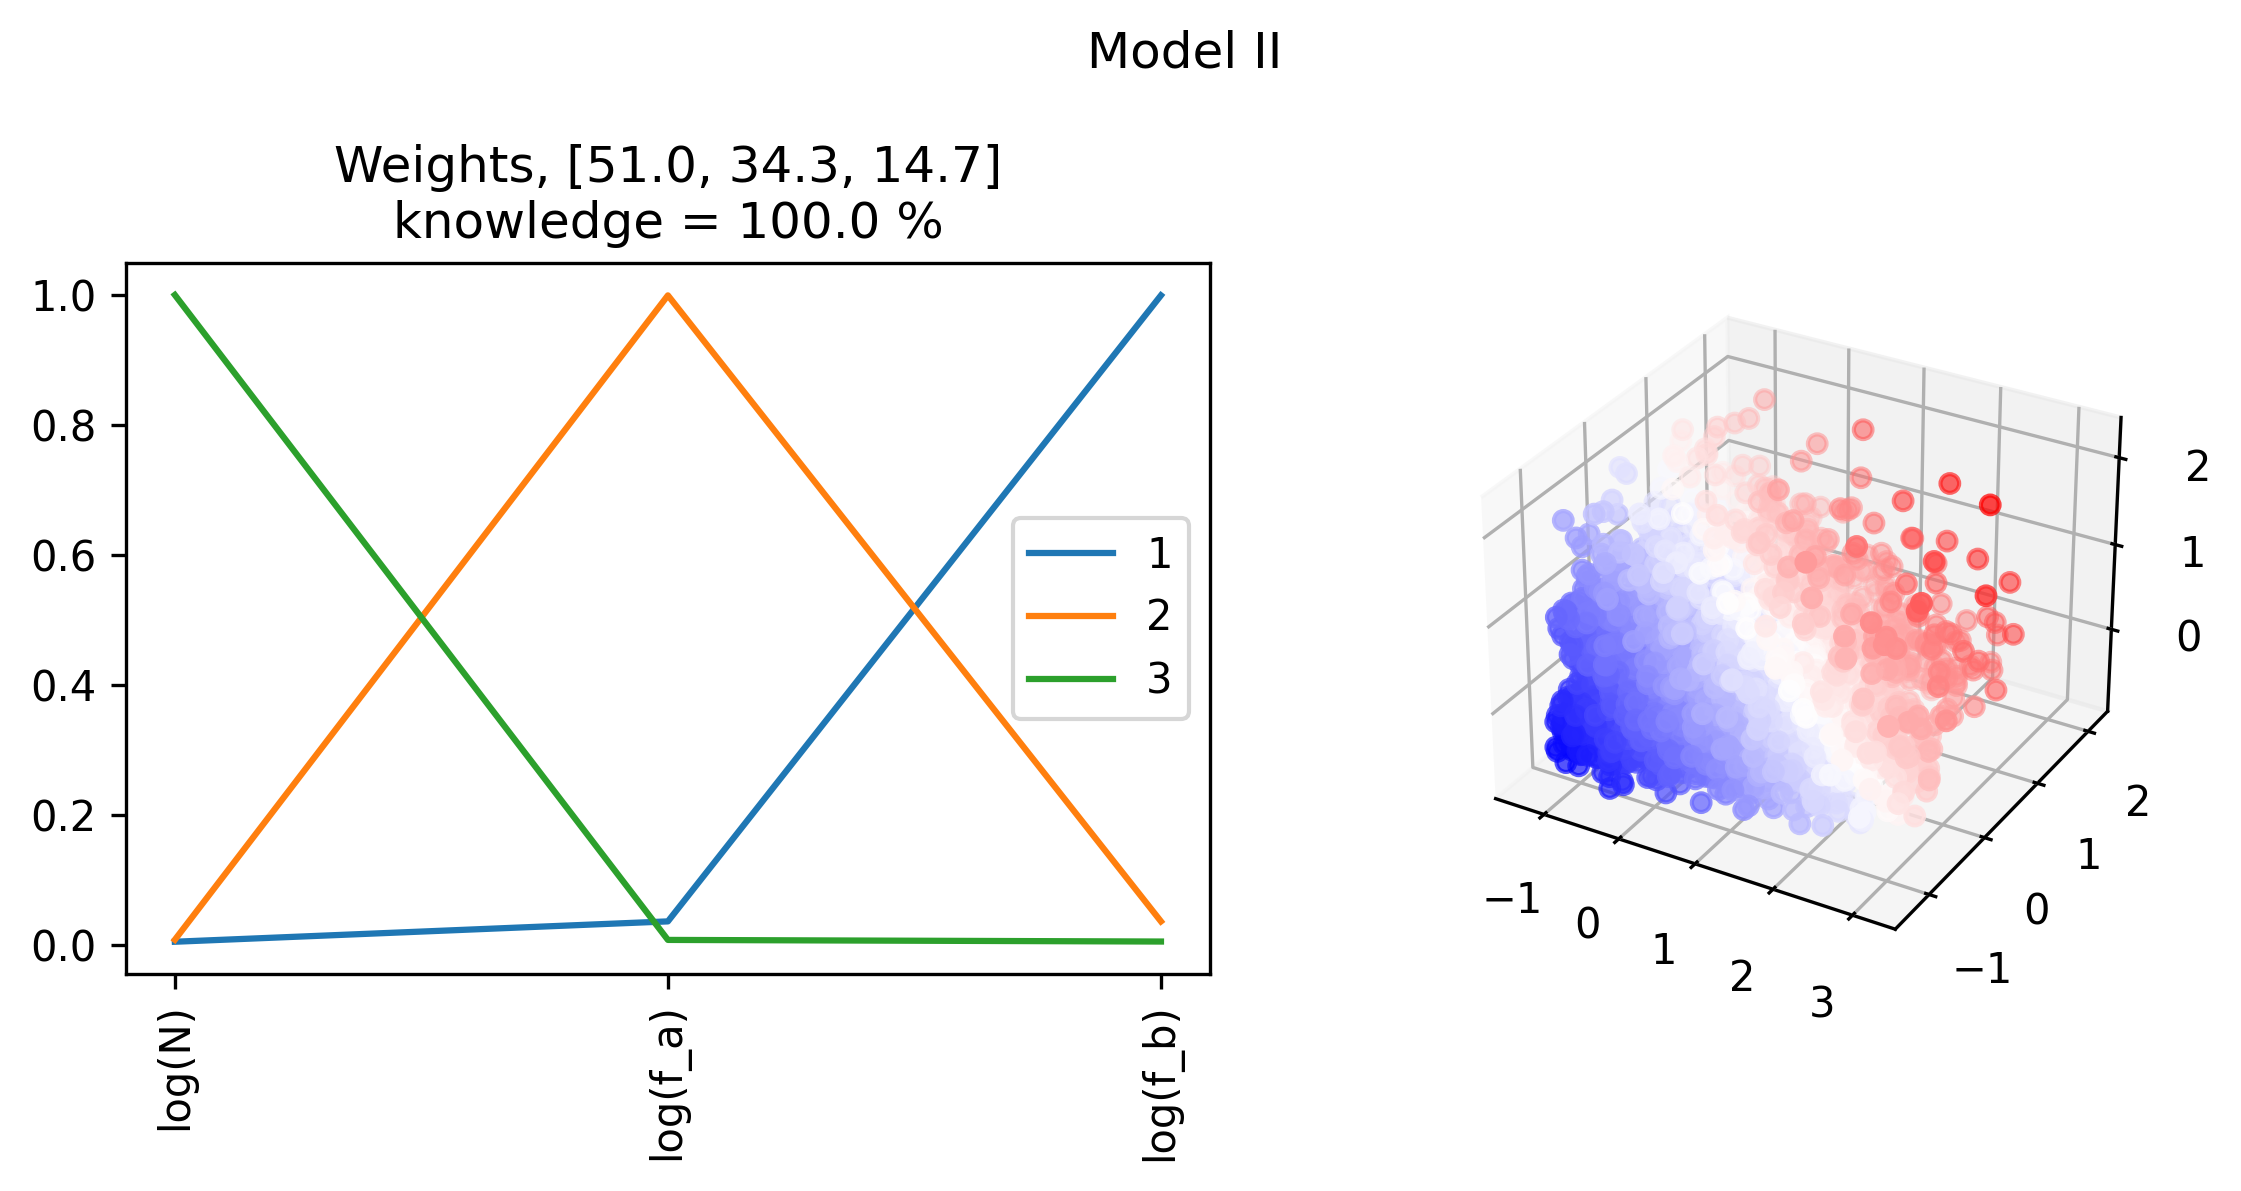

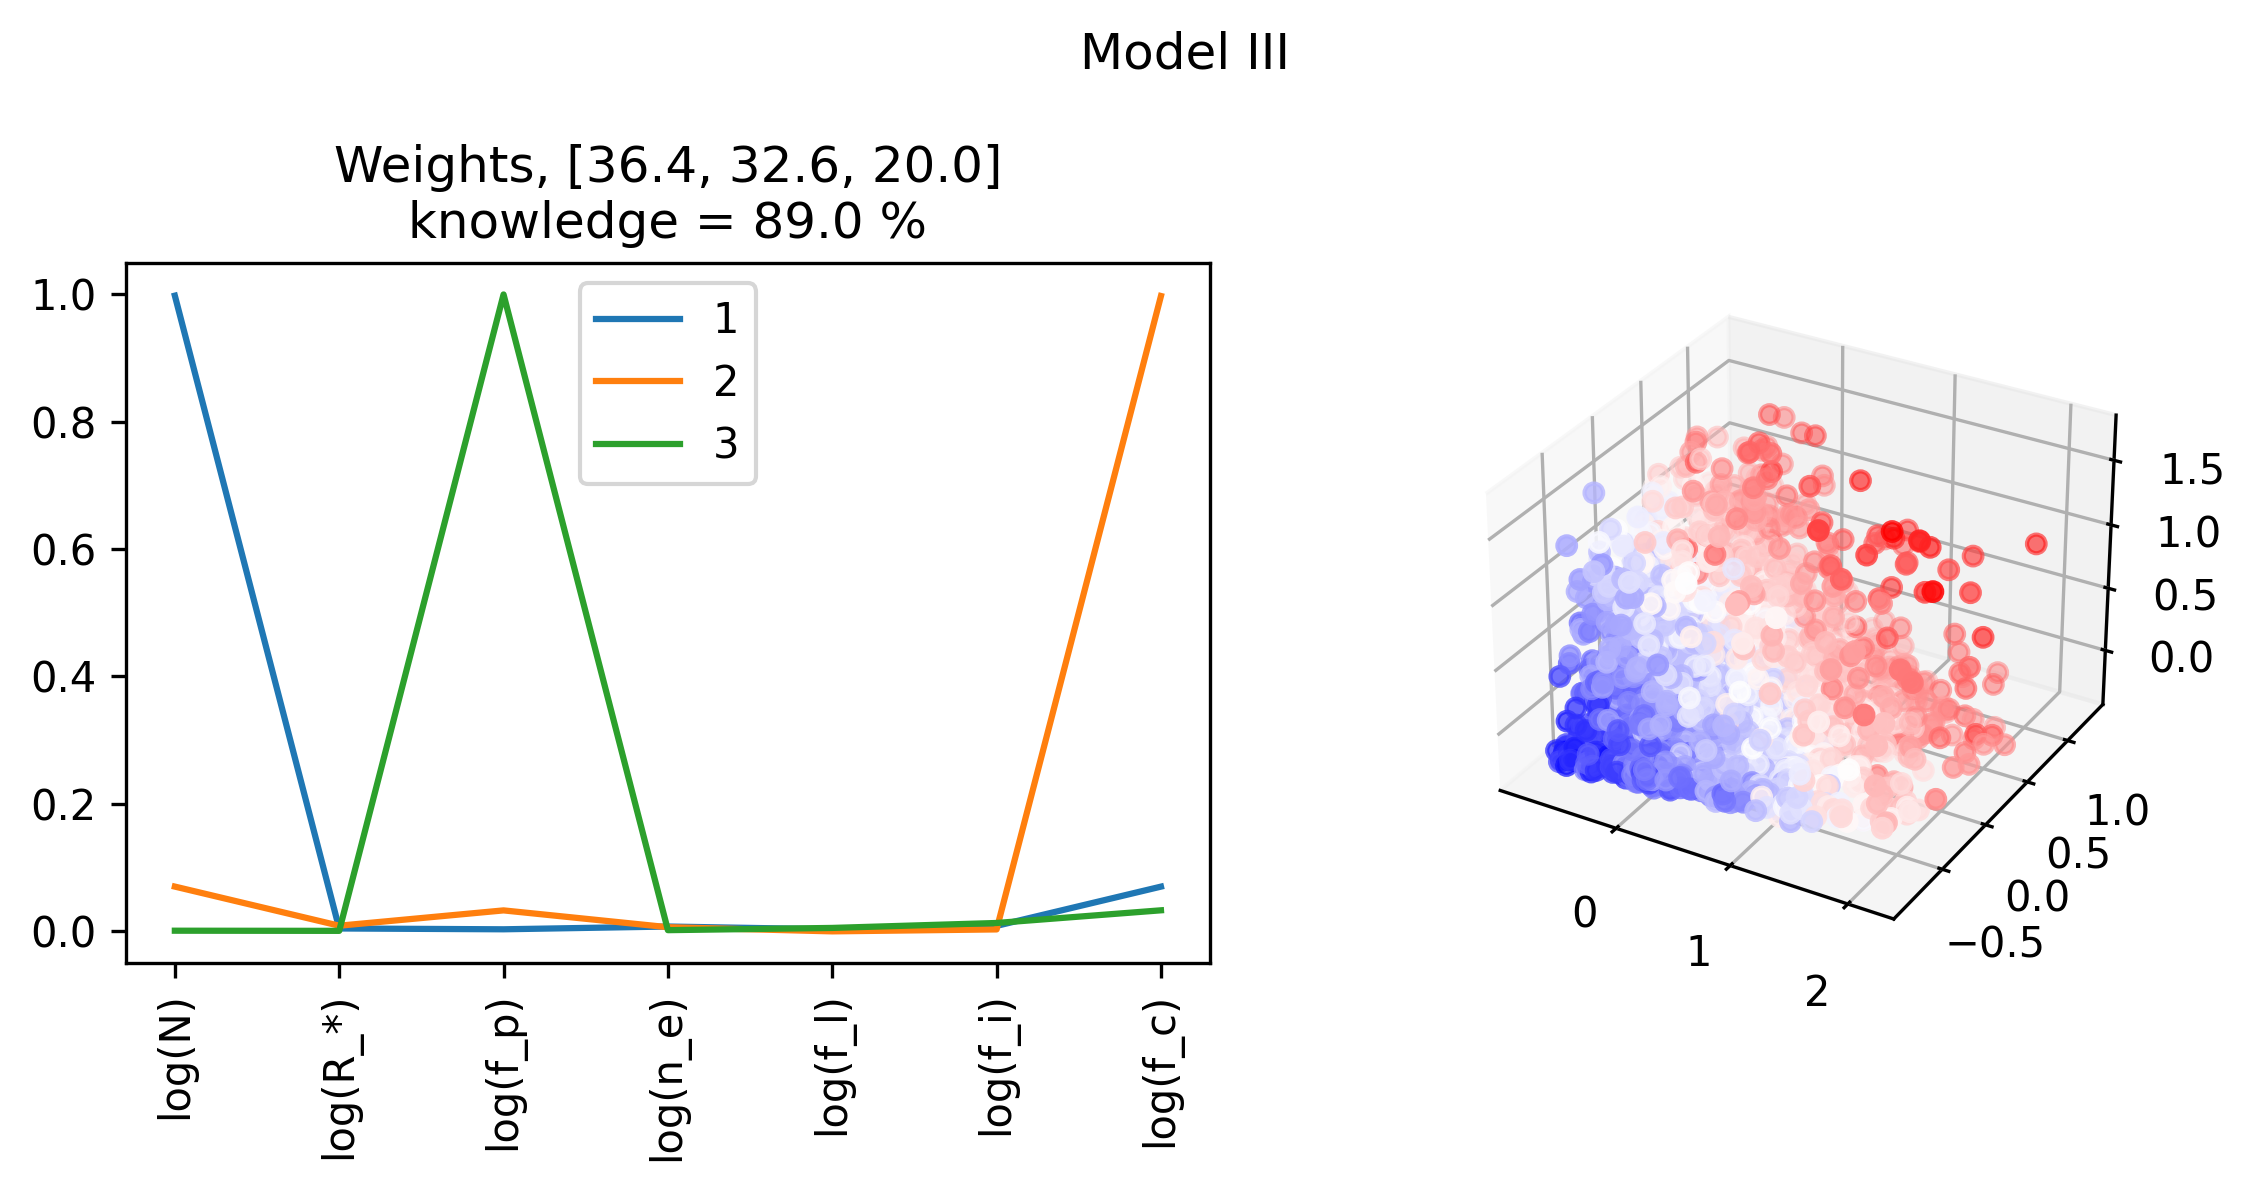

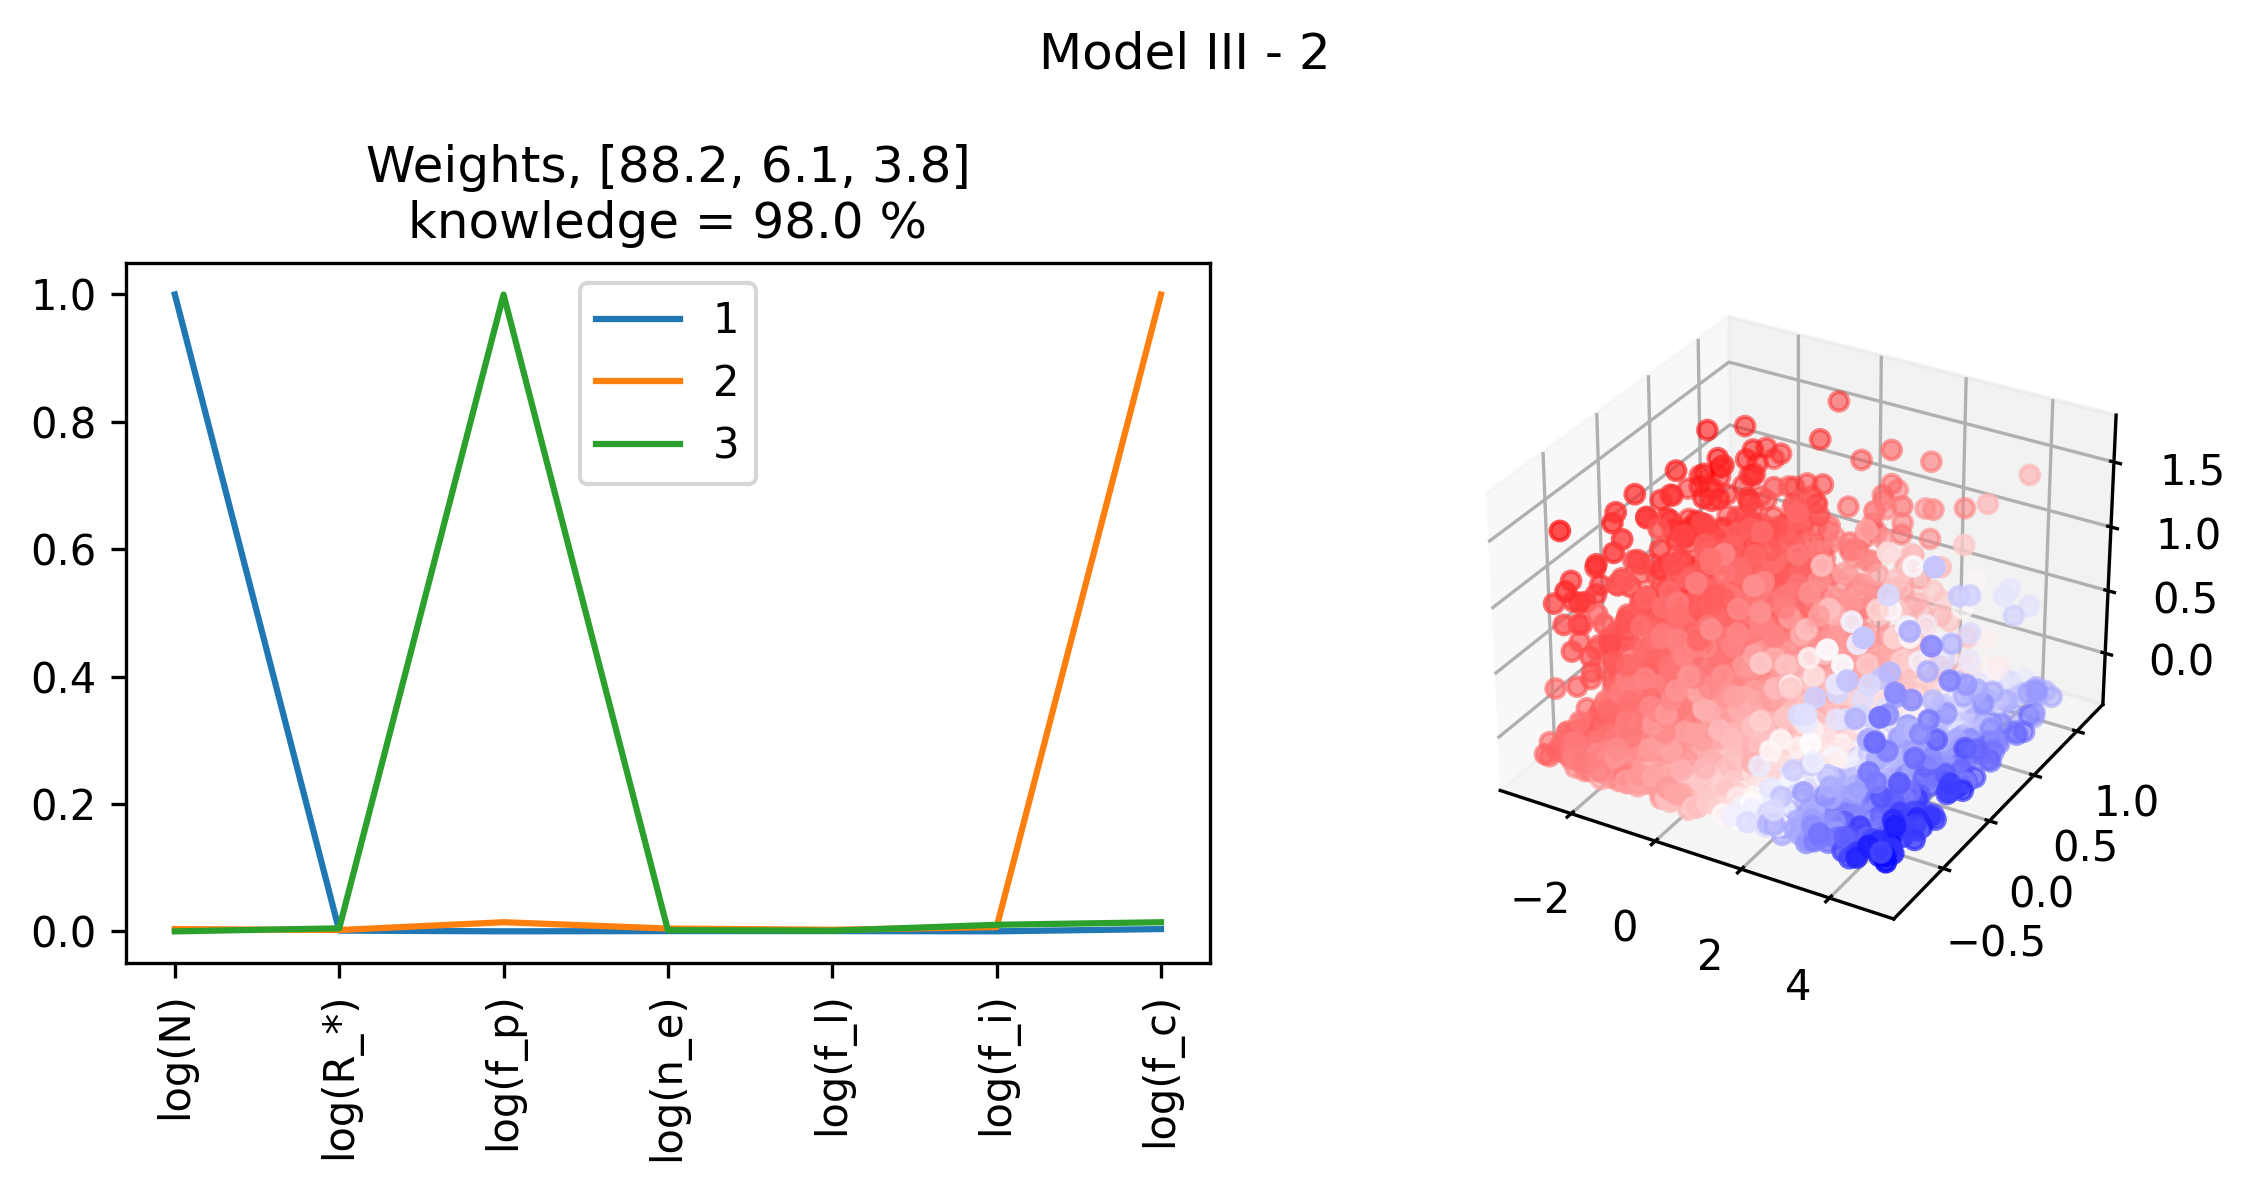

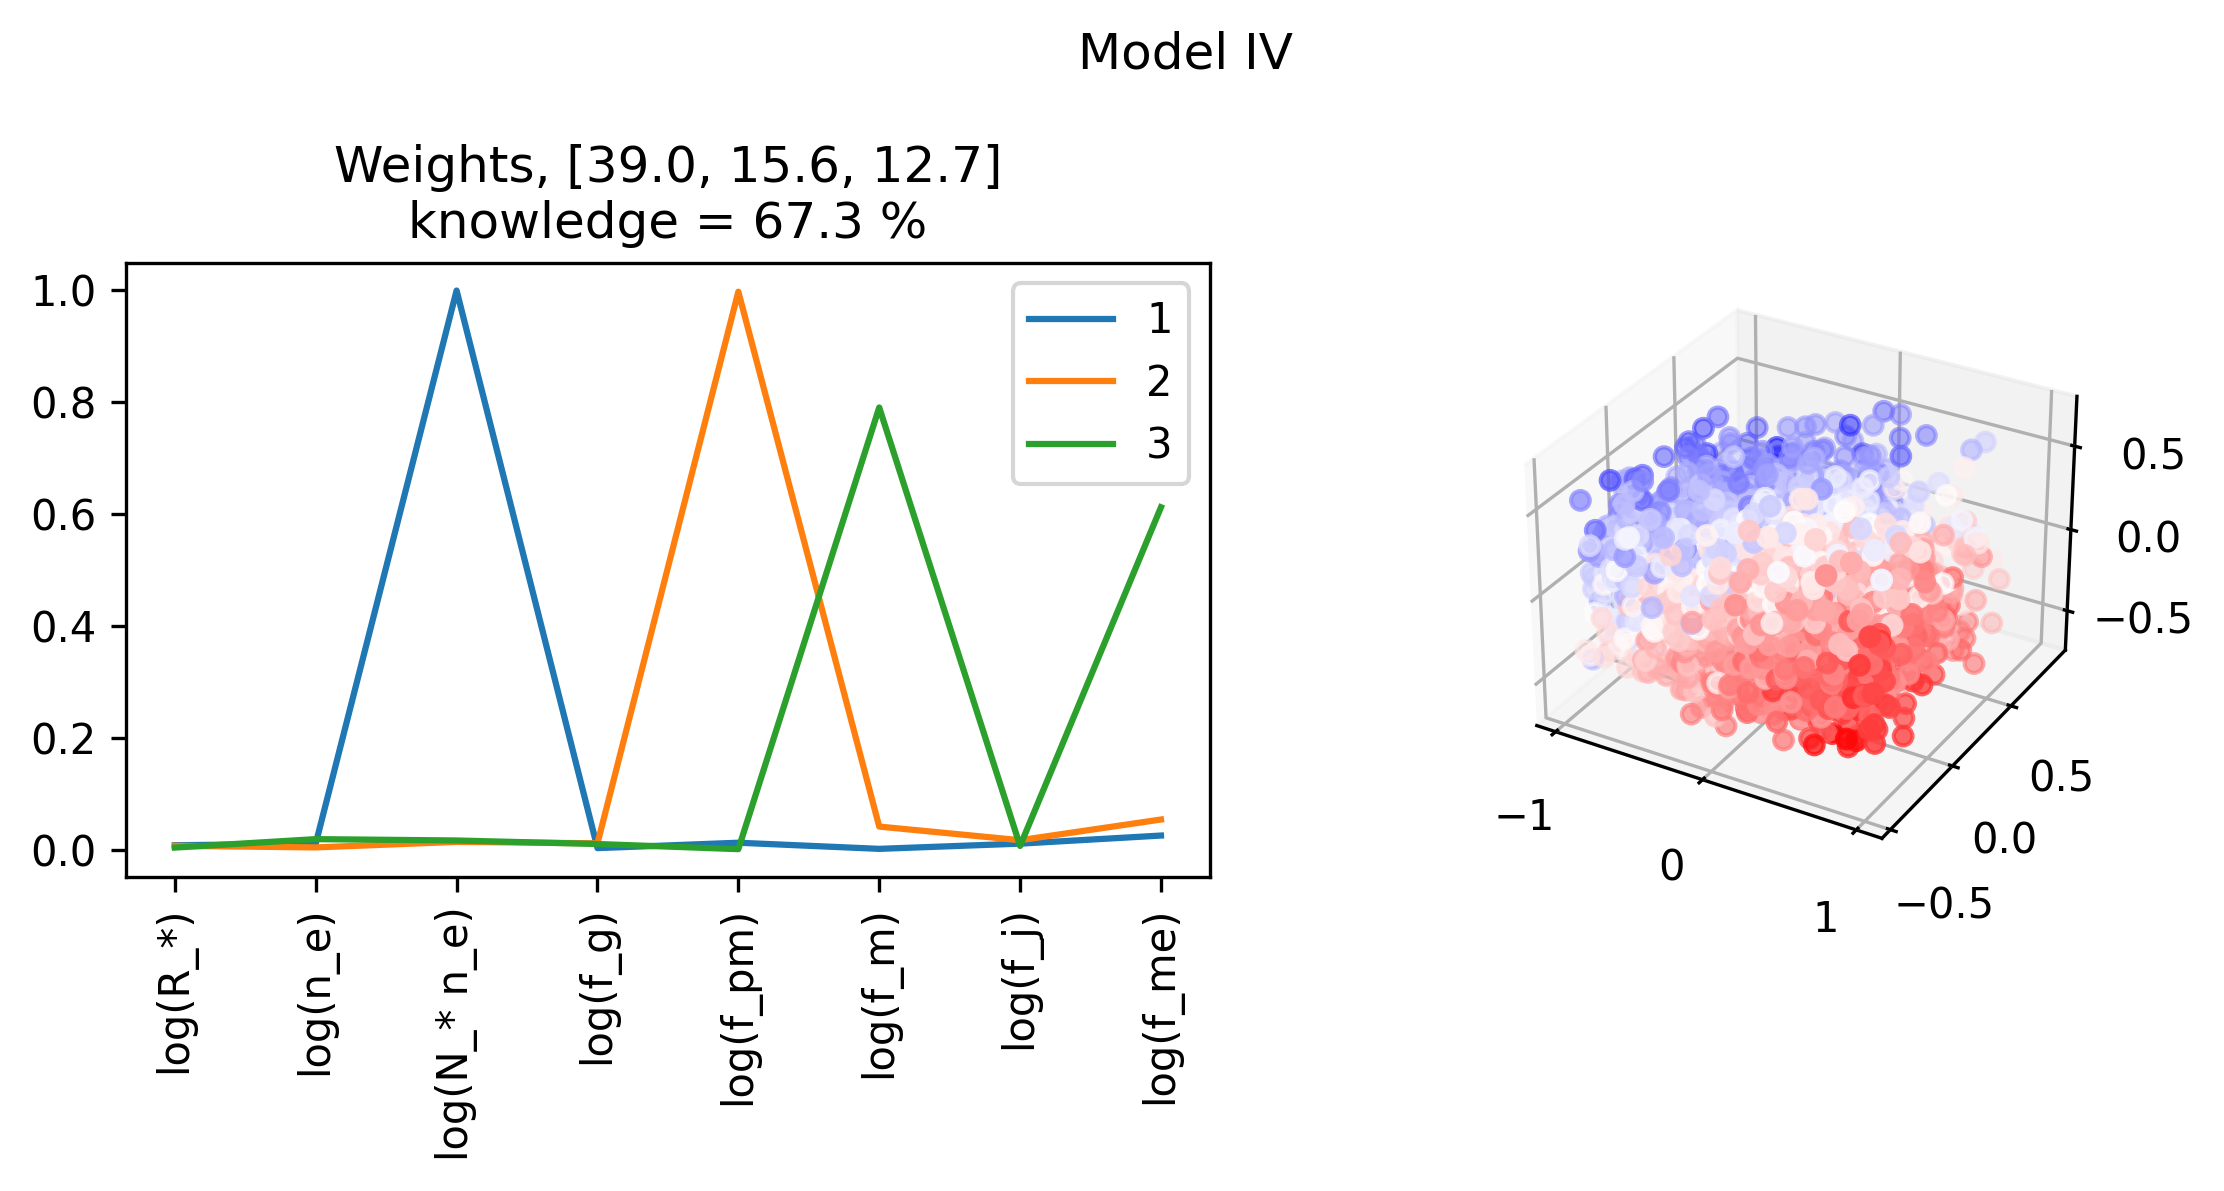

In [2]:
for d, p, l, m in podatki:
    pca = PCA().fit(d)
    data = pca.transform(d)
    plt.figure(figsize=(8, 4), dpi=300, tight_layout=True), plt.suptitle(m)
    plt.subplot(121)
    plt.plot(np.abs(pca.components_.T[:, 0]), label="1")
    plt.plot(np.abs(pca.components_.T[:, 1]), label="2")
    plt.plot(np.abs(pca.components_.T[:, 2]), label="3")
    plt.xticks(list(range(len(p))), p, rotation=90)
    plt.title(f"Weights, {list(np.round(pca.explained_variance_[:3] / np.sum(pca.explained_variance_) * 100, 1))}"
              f"\nknowledge = {(np.sum(pca.explained_variance_[:3]) / np.sum(pca.explained_variance_)) * 100:.1f} %")
    plt.legend(loc="best")
    ax = plt.subplot(122, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=l, cmap="bwr")
plt.show()

\section{Rules}
\input{rules.txt}

In [3]:
with open("rules_exact.txt", "r") as f:
    rules_list = eval(f.read())


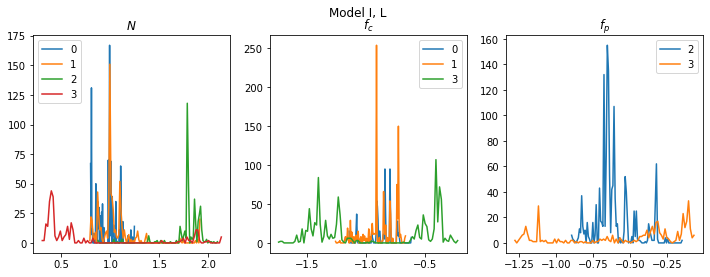

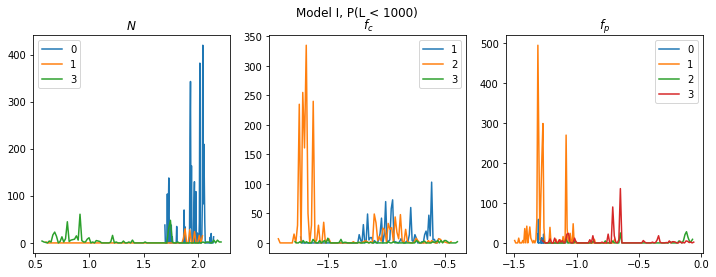

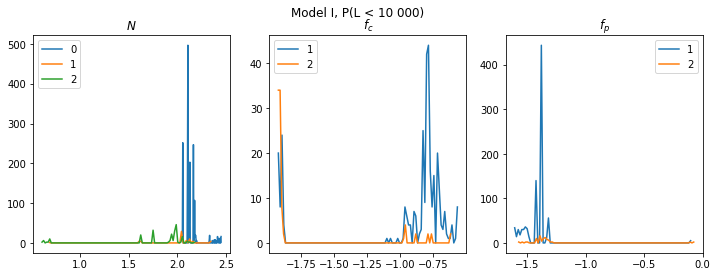

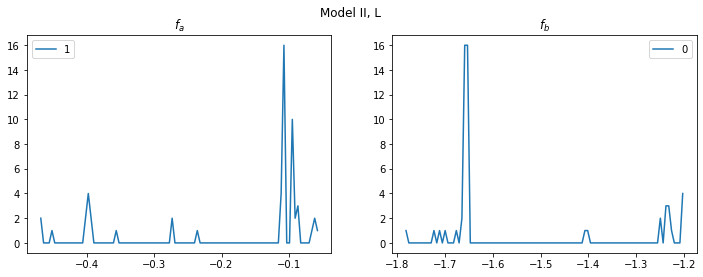

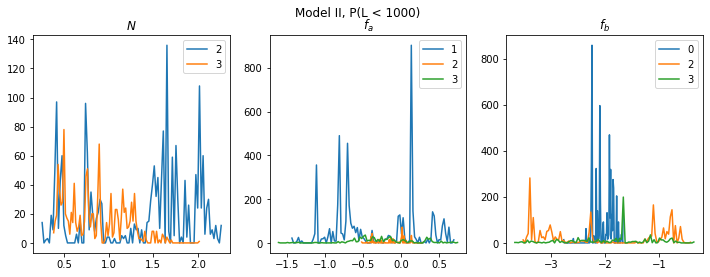

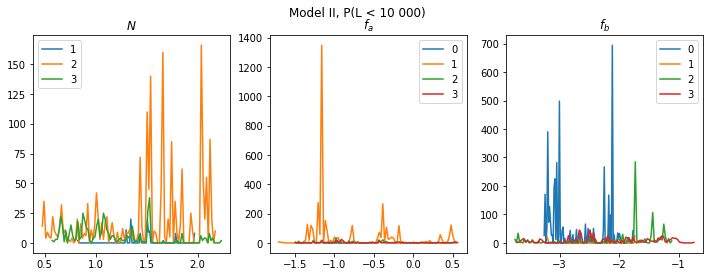

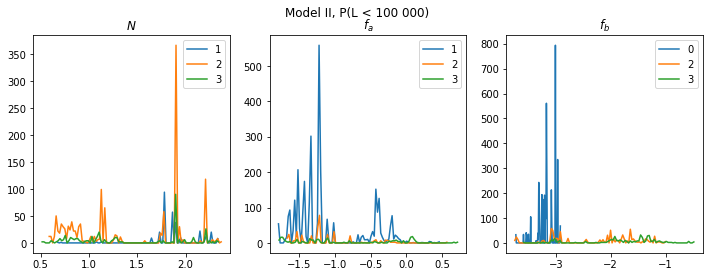

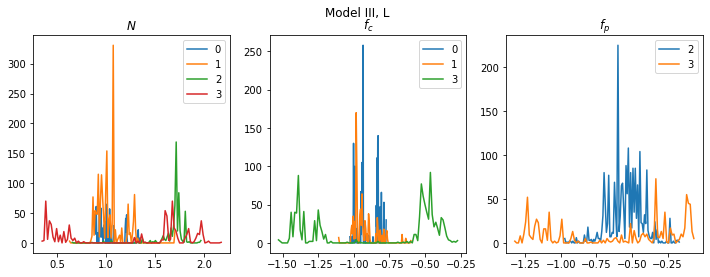

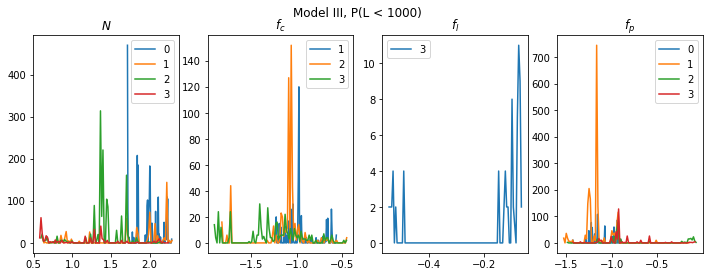

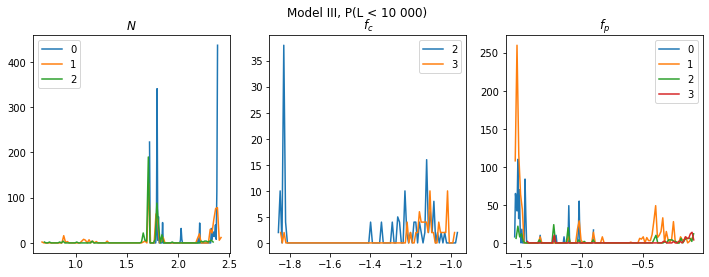

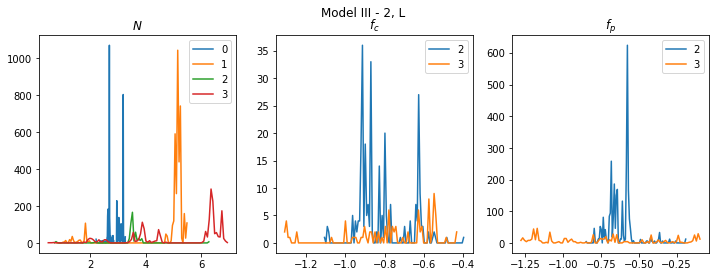

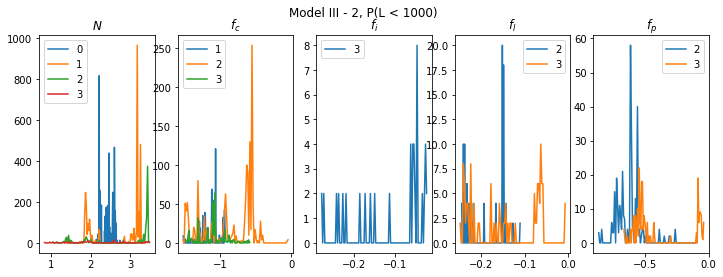

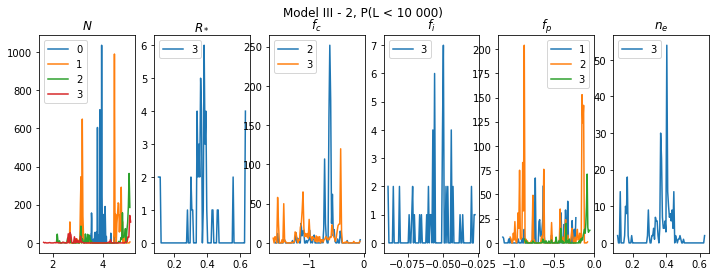

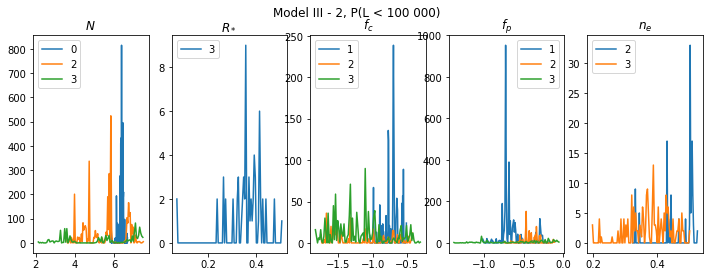

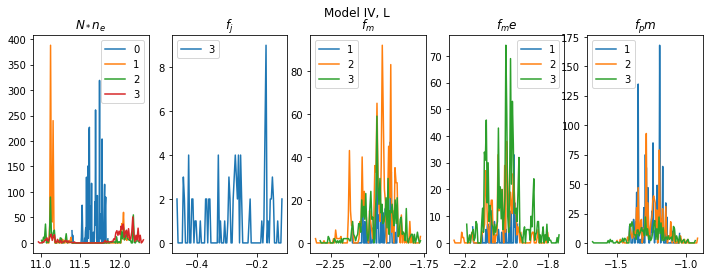

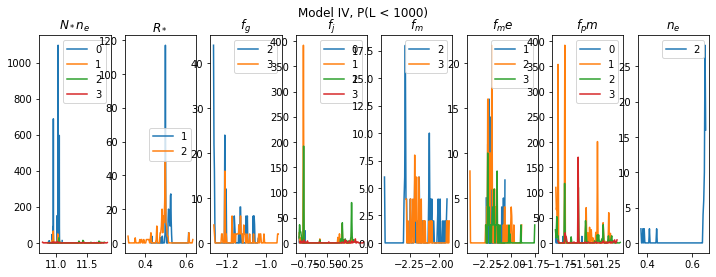

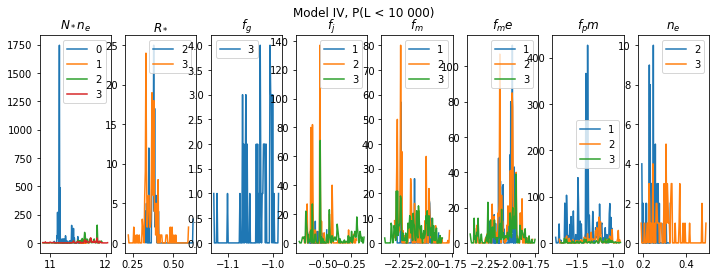

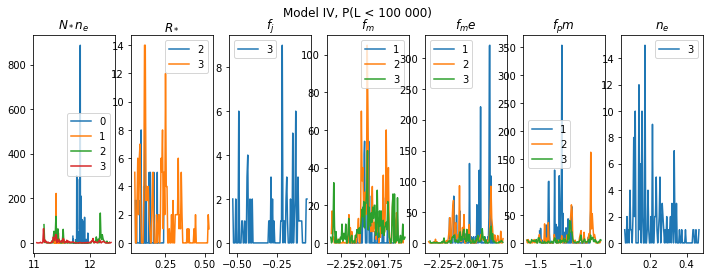

In [4]:
data = []
for model, label, rules in rules_list:
    parameters = {}
    params = set()
    depths = set()
    for rule in rules:
        for depth, r in enumerate(rule[:-1]):
            parameters[(r[0], depth)] = parameters.get((r[0], depth), []) + [r[2]]
            params.add(r[0])
            depths.add(depth)
    params = sorted(list(params))
    depths = sorted(list(depths))
    data.append((model, label, parameters, params, depths))
for model, label, parameters, params, depths in data:
    if "Super" in model:
        continue
    lens = [p for p in params if sum([len(parameters.get((p, d), [])) > 50 for d in depths]) > 0]
    if len(lens) > 0:
        plt.figure(figsize=(12, 4))
        plt.suptitle(f"{model}, {label}")
        for i, p in enumerate(lens):
            plt.subplot(1, len(lens), i+1)
            plt.title(f"${p}$")
            for d in depths:
                thres = parameters.get((p, d), [])
                if len(thres) > 50:
                    h, b = np.histogram(thres, 100)
                    plt.plot(b[:-1], h, label=d)
            plt.legend()
        plt.show()
# key je lahko seznam parametrov in na katero stran gre, potem pa opazuj kako se vsakemu parametru spreminjajo meje in rezultat, impurity ...

* za vsak parametrej poglej pogostost pojavljanja parametra in ločitveno vrednost pri parametru
* Besedilo članka